In [1]:
import re
import pandas as pd
import numpy as np
# from mlutils import dataset, connector
import scipy.stats
from scipy.stats import *
from sklearn.preprocessing import StandardScaler
import math
import matplotlib.pyplot as plt
import warnings
import statsmodels.api as sm 
#import seaborn as sns
#import pylab as py 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:

##checking what type of pdf visibility is :
def standarise(dataframe,column,pct,pct_lower):
    sc = StandardScaler() 
    y = dataframe[column][dataframe[column].notnull()].to_list()
    y.sort()
    len_y = len(y)
    y = y[int(pct_lower * len_y):int(len_y * pct)]
    len_y = len(y)
    yy=([[x] for x in y])
    
    y_std =sc.fit_transform(yy)
    y_std = y_std.flatten()
    return y_std,len_y,y



In [3]:
data_2020 = pd.read_excel('/Users/varungandhi/Downloads/Budapest-44527-10-perces.xlsx', sheet_name= 'adat')

#pd.set_option('display.max_rows', 500)

In [4]:
data_2020.columns

Index(['idő (CET)', 'T', 'U', 'P', 'FS', 'FSD', 'R', 'V', 'SR', 'SREF', 'SAL',
       'SSUL', 'ET10', 'ET20', 'ET50', 'ET100', 'EU10', 'EU20', 'EU50'],
      dtype='object')

In [5]:
data_2020 = data_2020.rename(columns = {'idő (CET)':'Time (CET)', 'T' : 'Temperature', 'U':'Relative Humidity', 'P': 'Pressure',
                                       'FS': 'average wind speed (m/s)', 'FSD':'wind direction', 'R': 'precipitation amount (mm)',
                                       'V': 'Visibility(m)', 'SR':'global radiation', 
                                        'SREF': 'reflex radiation', 
                                        'SAL':'atmosphere long-wave reflection', 
                                        'SSUL': 'surface long-wave radiation'})



In [6]:
data_2020.columns

Index(['Time (CET)', 'Temperature', 'Relative Humidity', 'Pressure',
       'average wind speed (m/s)', 'wind direction',
       'precipitation amount (mm)', 'Visibility(m)', 'global radiation',
       'reflex radiation', 'atmosphere long-wave reflection',
       'surface long-wave radiation', 'ET10', 'ET20', 'ET50', 'ET100', 'EU10',
       'EU20', 'EU50'],
      dtype='object')

In [7]:
data_2020['Time (CET)'] = pd.to_datetime(data_2020['Time (CET)'])

In [8]:
time = []
for i in range(len(data_2020['Time (CET)'])):
    time.append(data_2020['Time (CET)'][i].strftime("%H:%M:%S"))
    
data_2020['time'] = time

In [9]:
day_or_night = []
for i in range(len(data_2020['time'])):
    if data_2020['time'][i] >= '07:00:00' and data_2020['time'][i] <= '17:00:00' :
        day_or_night.append('Day')
    

    else:
        day_or_night.append('Night')
        
#print(day_or_night.count('Night'), day_or_night.count('Day'))

data_2020['day_or_night'] = day_or_night


day_night = []

for i in range(len(data_2020['day_or_night'])):
    if data_2020['day_or_night'][i] == 'Day': 
        day_night.append(1)
        
    if data_2020['day_or_night'][i] == 'Night':
        day_night.append(0)
    

        
print(day_or_night.count('Night'), day_or_night.count('Day'))
print(day_night.count(0), day_night.count(1))

data_2020['day_night'] = day_night


rain_nrain = []

for i in range(len(data_2020['precipitation amount (mm)'])):
    if data_2020['precipitation amount (mm)'][i] ==0:
        rain_nrain.append('nrain')
    if data_2020['precipitation amount (mm)'][i] >0:
        rain_nrain.append('rain')
        
data_2020['rain_nrain'] = rain_nrain

rain_0_1 = []

for i in range(len(data_2020['rain_nrain'])):
    if data_2020['rain_nrain'][i] == 'nrain':
        rain_0_1.append(0)
    if data_2020['rain_nrain'][i] == 'rain':
        rain_0_1.append(1)
data_2020['rain_0_1'] = rain_0_1


a = 17.625
b = 243.04
data_2020['num']= b * ((np.log(data_2020['Relative Humidity']/100)) + (a * data_2020['Temperature'])/(b + data_2020['Temperature'])) 
data_2020['den'] = a - np.log(data_2020['Relative Humidity']/100) - (a * data_2020['Temperature'])/(b + data_2020['Temperature'])

data_2020['td'] = data_2020['num']/data_2020['den']
data_2020['t-td'] = data_2020['Temperature'] - data_2020['td']

16351 12017
16351 12017


In [10]:
df1 = data_2020.iloc[:, 0:12]
df2 = data_2020.iloc[:, 19:]
df_2020 = pd.concat([df1, df2], axis=1)
df_2020.columns

Index(['Time (CET)', 'Temperature', 'Relative Humidity', 'Pressure',
       'average wind speed (m/s)', 'wind direction',
       'precipitation amount (mm)', 'Visibility(m)', 'global radiation',
       'reflex radiation', 'atmosphere long-wave reflection',
       'surface long-wave radiation', 'time', 'day_or_night', 'day_night',
       'rain_nrain', 'rain_0_1', 'num', 'den', 'td', 't-td'],
      dtype='object')

In [11]:
#data_2020_95_night = data_2020[(data_2020['Relative Humidity']>=95) & (data_2020['day_or_night'] == 'Night')]
#data_2020_95_day = data_2020[(data_2020['Relative Humidity']>=95) & (data_2020['day_or_night'] == 'Day')]
df_2020_95 = df_2020[(df_2020['Relative Humidity'] >= 95)]
df_2020_95.columns

Index(['Time (CET)', 'Temperature', 'Relative Humidity', 'Pressure',
       'average wind speed (m/s)', 'wind direction',
       'precipitation amount (mm)', 'Visibility(m)', 'global radiation',
       'reflex radiation', 'atmosphere long-wave reflection',
       'surface long-wave radiation', 'time', 'day_or_night', 'day_night',
       'rain_nrain', 'rain_0_1', 'num', 'den', 'td', 't-td'],
      dtype='object')

In [12]:
df_vis_500  =  df_2020[(df_2020['Visibility(m)'] < 500)]
df_vis_1000  =  df_2020[(df_2020['Visibility(m)'] < 1000)]
df_vis_5000  =  df_2020[(df_2020['Visibility(m)'] >= 1000) & (df_2020['Visibility(m)'] < 5000)]
df_vis_5001  =  df_2020[(df_2020['Visibility(m)'] > 5000)]

array([0.  , 0.27, 0.54, 0.81, 1.08, 1.35, 1.62, 1.89, 2.16, 2.43, 2.7 ])

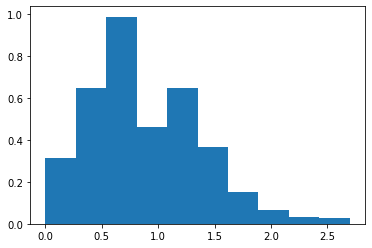

In [13]:
y_std_500,len_y_500,y_500 = standarise(df_vis_500,'average wind speed (m/s)',0.999,0.001)
count_500, bins_500, ignored = plt.hist(y_500, density= True)
#plt.xlabel('Visibility')
#plt.ylabel('Frequency')
#count.shape
bins_500


array([0.  , 0.27, 0.54, 0.81, 1.08, 1.35, 1.62, 1.89, 2.16, 2.43, 2.7 ])

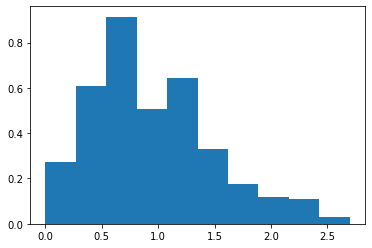

In [14]:
y_std_1000,len_y_1000,y_1000 = standarise(df_vis_1000,'average wind speed (m/s)',0.999,0.001)
count_1000, bins_1000, ignored = plt.hist(y_1000, density= True)
#plt.xlabel('Visibility')
#plt.ylabel('Frequency')
#count.shape
bins_1000

array([0.  , 0.45, 0.9 , 1.35, 1.8 , 2.25, 2.7 , 3.15, 3.6 , 4.05, 4.5 ])

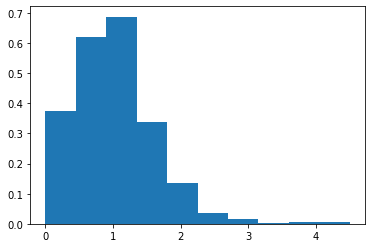

In [15]:
y_std_5000,len_y_5000,y_5000 = standarise(df_vis_5000,'average wind speed (m/s)',0.999,0.001)
count_5000, bins_5000, ignored = plt.hist(y_5000, density= True)
#plt.xlabel('Visibility')
#plt.ylabel('Frequency')
#count.shape
bins_5000

array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ])

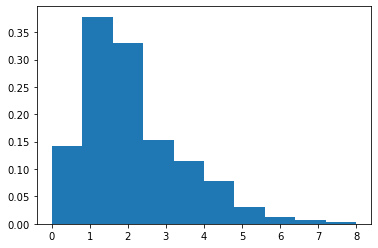

In [16]:
y_std_5001,len_y_5001,y_5001 = standarise(df_vis_5001,'average wind speed (m/s)',0.999,0.001)
count_5001, bins_5001, ignored = plt.hist(y_5001, density= True)
#plt.xlabel('Visibility')
#plt.ylabel('Frequency')
#count.shape
bins_5001

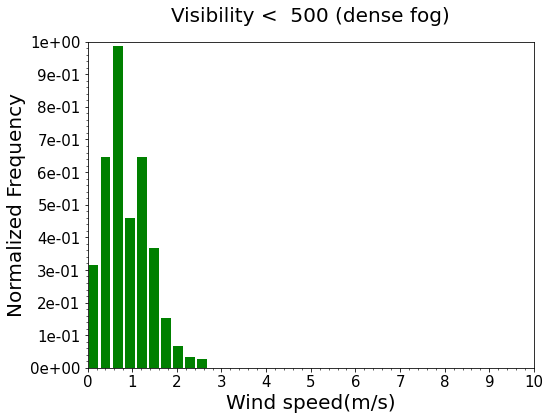

In [17]:
from matplotlib.ticker import FormatStrFormatter

ax = df_vis_500.hist(grid= False, rwidth=0.8, bins = bins_500,
                   color='g',column = 'average wind speed (m/s)', figsize= (8,6),
                     density = True)


ax[0][0].set_ylabel('Normalized Frequency',fontdict={'fontsize':20})
#ax[1].set_ylabel('Normalized Frequency',fontdict={'fontsize':15})

ax[0][0].set_xlabel('Wind speed(m/s)',fontdict={'fontsize':20})
#ax[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
ax[0][0].set_title('Visibility <  500 (dense fog)',pad=20, fontdict={'fontsize':20})
#ax[1].set_title('Rain (Rh >95%)',pad=20, fontdict={'fontsize':20})

ax[0][0].set_xlim([0, 10])
ax[0][0].set_xticks(np.arange(0,10.5, 1))

ax[0][0].set_ylim([0, 1.0])
ax[0][0].set_yticks(np.arange(0,1.1, 0.1))

ax[0][0].minorticks_on()

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
ax[0][0].tick_params(axis='x', which='both', labelsize=15)
ax[0][0].tick_params(axis='y', which='both', labelsize=15)
#ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
#print(a,b,Nplus1)

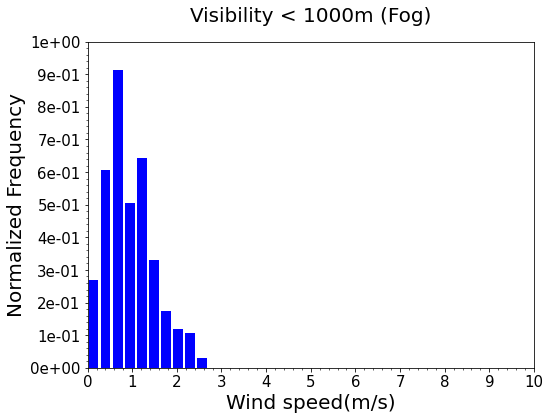

In [18]:

ax = df_vis_1000.hist(grid= False, rwidth=0.8,bins  = bins_1000,
                   color='b',column = 'average wind speed (m/s)', figsize= (8,6),
                     density = True)


ax[0][0].set_ylabel('Normalized Frequency',fontdict={'fontsize':20})
#ax[1].set_ylabel('Normalized Frequency',fontdict={'fontsize':15})

ax[0][0].set_xlabel('Wind speed(m/s)',fontdict={'fontsize':20})
#ax[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
ax[0][0].set_title('Visibility < 1000m (Fog)',pad=20, fontdict={'fontsize':20})
#ax[1].set_title('Rain (Rh >95%)',pad=20, fontdict={'fontsize':20})

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
#ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))

ax[0][0].set_xlim([0, 10])
ax[0][0].set_xticks(np.arange(0,10.5, 1))

ax[0][0].set_ylim([0, 1.0])
ax[0][0].set_yticks(np.arange(0,1.1, 0.1))

ax[0][0].minorticks_on()
ax[0][0].tick_params(axis='x', which='both', labelsize=15)
ax[0][0].tick_params(axis='y', which='both', labelsize=15)

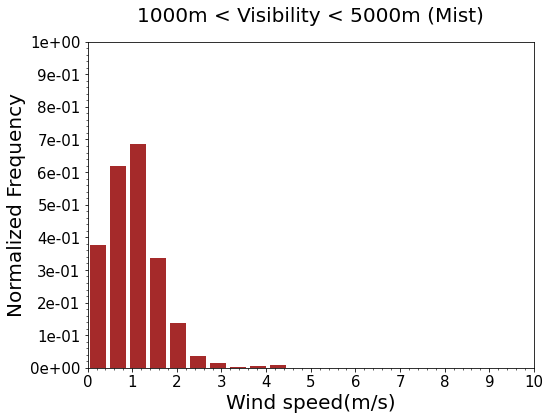

In [19]:

ax = df_vis_5000.hist(grid= False, rwidth=0.8,bins= bins_5000,
                   color='brown',column = 'average wind speed (m/s)', figsize= (8,6),
                     density = True)


ax[0][0].set_ylabel('Normalized Frequency',fontdict={'fontsize':20})
#ax[1].set_ylabel('Normalized Frequency',fontdict={'fontsize':15})

ax[0][0].set_xlabel('Wind speed(m/s)',fontdict={'fontsize':20})
#ax[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
ax[0][0].set_title('1000m < Visibility < 5000m (Mist)',pad=20, fontdict={'fontsize':20})
#ax[1].set_title('Rain (Rh >95%)',pad=20, fontdict={'fontsize':20})

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
#ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))


ax[0][0].set_xlim([0, 10])
ax[0][0].set_xticks(np.arange(0,10.5, 1))

ax[0][0].set_ylim([0, 1.0])
ax[0][0].set_yticks(np.arange(0,1.1, 0.1))

ax[0][0].minorticks_on()


ax[0][0].tick_params(axis='x', which='both', labelsize=15)
ax[0][0].tick_params(axis='y', which='both', labelsize=15)

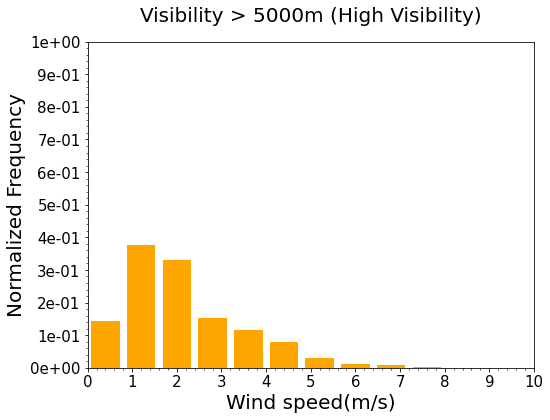

In [20]:

ax = df_vis_5001.hist(grid= False, rwidth=0.8,bins = bins_5001,
                   color='orange',column = 'average wind speed (m/s)', figsize= (8,6),
                     density = True)


ax[0][0].set_ylabel('Normalized Frequency',fontdict={'fontsize':20})
#ax[1].set_ylabel('Normalized Frequency',fontdict={'fontsize':15})

ax[0][0].set_xlabel('Wind speed(m/s)',fontdict={'fontsize':20})
#ax[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
ax[0][0].set_title('Visibility > 5000m (High Visibility)',pad=20, fontdict={'fontsize':20})
#ax[1].set_title('Rain (Rh >95%)',pad=20, fontdict={'fontsize':20})

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

ax[0][0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
#ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))


ax[0][0].set_xlim([0, 10])
ax[0][0].set_xticks(np.arange(0,10.5, 1))
ax[0][0].set_ylim([0, 1.0])
ax[0][0].set_yticks(np.arange(0,1.1, 0.1))

ax[0][0].minorticks_on()
ax[0][0].tick_params(axis='x', which='both', labelsize=15)
ax[0][0].tick_params(axis='y', which='both', labelsize=15)

In [21]:

import pandas as pd
from sklearn import preprocessing

x = df_2020_95['Visibility(m)'].values.reshape(-1,1)

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df_2020_95['vis(m)'] = x_scaled
df_2020_95['vis(m)']

0        0.567269
1        0.691797
2        0.666801
3        0.567319
4        0.697681
           ...   
28276    0.751144
28277    0.852789
28278    1.000000
28279    1.000000
28280    1.000000
Name: vis(m), Length: 7256, dtype: float64

,Visibility(m),average wind speed (m/s)
count,7256.000000,7256.000000
mean,6692.970645,1.202370
std,4842.426673,0.714757
min,117.000000,0.000000
25%,3270.750000,0.700000
50%,5612.500000,1.100000
75%,9122.500000,1.600000
max,20000.000000,4.800000


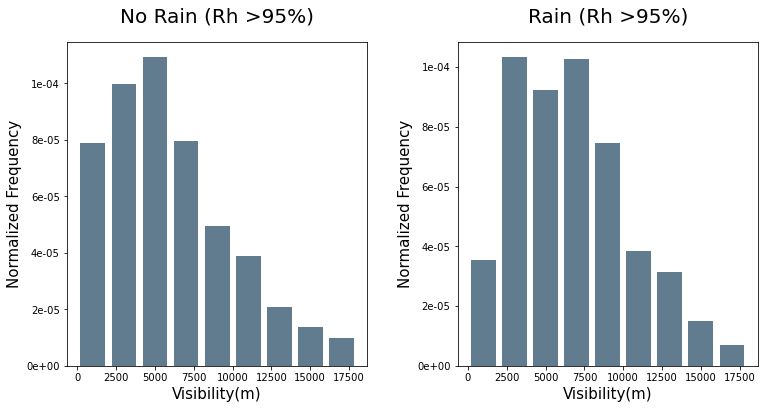

In [22]:
from matplotlib.ticker import FormatStrFormatter
ax = df_2020_95.hist(grid=True, bins= range(0,20000,2000), rwidth=0.8,
                   color='#607c8e', by = 'rain_nrain',column = 'Visibility(m)', figsize= (12,6),
                     density = True, rot = 0)

ax[0].set_ylabel('Normalized Frequency',fontdict={'fontsize':15})
ax[1].set_ylabel('Normalized Frequency',fontdict={'fontsize':15})

ax[0].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
ax[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
ax[0].set_title('No Rain (Rh >95%)',pad=20, fontdict={'fontsize':20})
ax[1].set_title('Rain (Rh >95%)',pad=20, fontdict={'fontsize':20})

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

ax[0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
ax[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))


df_2020_95[['Visibility(m)', 'average wind speed (m/s)']].describe()


In [23]:
#fig,ax = plt.subplots()
#data_2020_95_nrain['Visibility(m)'].plot(kind = 'kde', ax = ax, by = 'day_or_night')

#data_2020_95_nrain.hist(grid=True, bins= range(0,20000,2000), rwidth=0.8,
                   #color='#607c8e',column = 'Visibility(m)', 
                        #figsize= (12,6), density = True, ax = ax)
df_2020_100 = data_2020[(df_2020['Relative Humidity'] == 100)]

,Visibility(m),average wind speed (m/s)
count,3725.000000,3725.000000
mean,4365.608322,1.112564
std,3687.255102,0.652244
min,117.000000,0.000000
25%,1880.000000,0.600000
50%,3698.000000,1.000000
75%,5850.000000,1.500000
max,20000.000000,4.800000


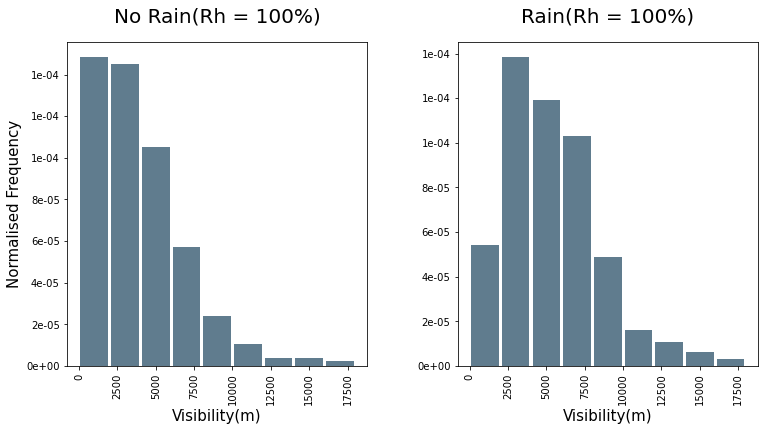

In [24]:
bx = df_2020_100.hist(grid=True, rwidth=0.9, bins= range(0,20000,2000),
                   color='#607c8e', by = 'rain_nrain',column = 'Visibility(m)', 
                      figsize= (12,6), density = True)

bx[0].set_ylabel('Normalised Frequency',fontdict={'fontsize':15})
bx[0].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
bx[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
bx[0].set_title('No Rain(Rh = 100%)',pad=20, fontdict={'fontsize':20})
bx[1].set_title('Rain(Rh = 100%)',pad=20, fontdict={'fontsize':20})

bx[0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
bx[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))

df_2020_100[['Visibility(m)', 'average wind speed (m/s)']].describe()

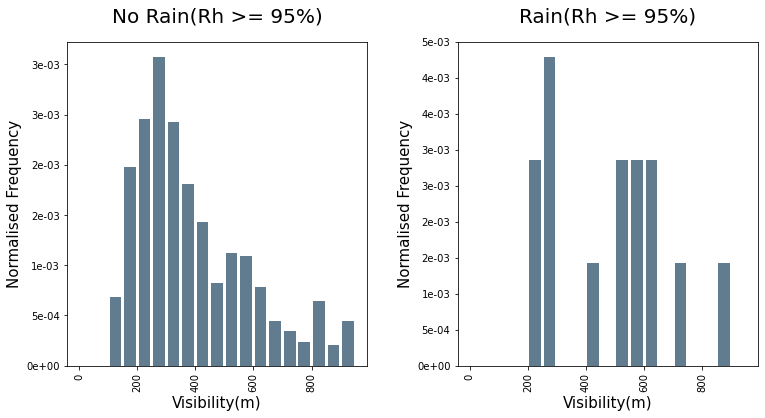

In [25]:

cx = df_2020_95.hist(grid=True, bins= range(0,1000,50), rwidth=0.8,
                  color='#607c8e', by = 'rain_nrain',column = 'Visibility(m)', figsize= (12,6),
                    density = True)

cx[0].set_ylabel('Normalised Frequency',fontdict={'fontsize':15})
cx[1].set_ylabel('Normalised Frequency',fontdict={'fontsize':15})

cx[0].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
cx[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
cx[0].set_title('No Rain(Rh >= 95%)',pad=20, fontdict={'fontsize':20})
cx[1].set_title('Rain(Rh >= 95%)',pad=20, fontdict={'fontsize':20})

cx[0].yaxis.set_major_formatter(FormatStrFormatter('%.e'))
cx[1].yaxis.set_major_formatter(FormatStrFormatter('%.e'))

#df_2020_95[['Visibility(m)', 'average wind speed (m/s)']].describe()

Text(0.5, 1.0, 'Rain(Rh = 100%)')

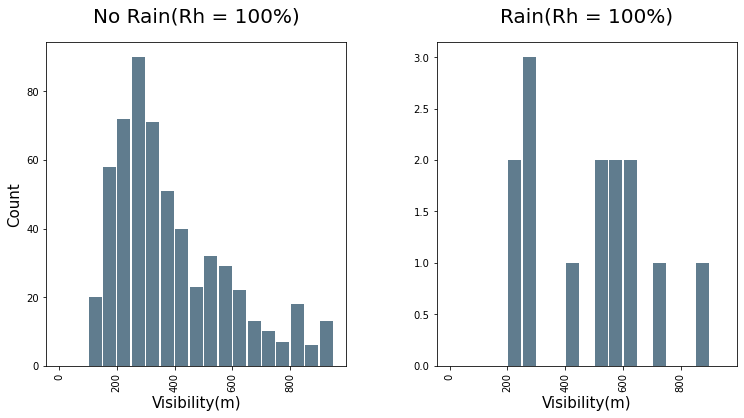

In [26]:

dx = df_2020_100.hist(grid=True, bins= range(0,1000,50), rwidth=0.9,
                   color='#607c8e', by = 'rain_nrain',column = 'Visibility(m)', figsize= (12,6))

dx[0].set_ylabel('Count',fontdict={'fontsize':15})
dx[0].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
dx[1].set_xlabel('Visibility(m)',fontdict={'fontsize':15})
dx[0].set_title('No Rain(Rh = 100%)',pad=20, fontdict={'fontsize':20})
dx[1].set_title('Rain(Rh = 100%)',pad=20, fontdict={'fontsize':20})

In [27]:
#colors = np.where(data_2020_95.day_night ==  1, 'red', 'g')
#gx = data_2020_95_day.plot(kind = 'scatter', x = 'average wind speed (m/s)', y = 'Visibility(m)', fontsize = 15)

from sklearn.linear_model import LinearRegression
from math import fabs
import statsmodels.api as sm

#X = data_2020_95_day['average wind speed (m/s)'].values.reshape(-1,1)  # values converts it into a numpy array
#Y = data_2020_95_day['Visibility(m)'].values.reshape(-1,1)  # values converts it into a numpy array


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     2161.
Date:                Sun, 14 Nov 2021   Prob (F-statistic):               0.00
Time:                        22:40:16   Log-Likelihood:                -68396.
No. Observations:                7433   AIC:                         1.368e+05
Df Residuals:                    7431   BIC:                         1.368e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.605e+04    445.619     58.447      0.0

(80.0, 100.0)

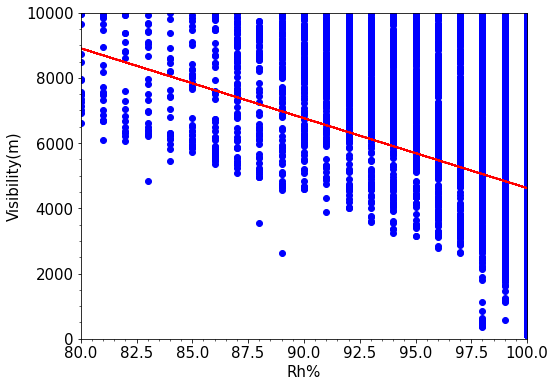

In [28]:
#from sklearn.linear_model import LinearRegression
#from math import fabs

reg_0 = LinearRegression()
###for day

df_2020_V_5000 = df_2020[(df_2020['Visibility(m)'] <= 10000)]
X = df_2020_V_5000['Relative Humidity'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_2020_V_5000['Visibility(m)'].values.reshape(-1,1)  # values converts it into a numpy array
x = sm.add_constant(df_2020_V_5000['Relative Humidity'].values.reshape(-1,1))

reg_0.fit(X, Y)
reg_0.coef_[0][0]

Y_pred = reg_0.predict(X)
model = sm.OLS(Y, x)
results = model.fit()
#cc = df_2020_V_5000[["Visibility(m)", "average wind speed (m/s)"]].corr()
print(results.summary())

print('coefficient of determination:', results.rsquared)

print('adjusted coefficient of determination:', results.rsquared_adj)
print('coefficient of determination:', reg_0.score(X,Y))
print('regression coefficients:', results.params)
print('slope:', reg_0.coef_)
print('intercept:', reg_0.intercept_)
#print(cc)

#print(scipy.stats.norm.interval(alpha=0.95, 
              #df=len(X)-1, 
              #loc=np.mean(X), scale=scipy.stats.sem(X)))
        
#print(scipy.stats.norm.interval(alpha=0.95, 
                 #loc=np.mean(X), scale=scipy.stats.sem(X)))


#mean_x = X.T.mean()
#
#n = len(X)
#
#dof = n - results.df_model - 1
#
#t = scipy.stats.t.ppf(1-0.025, df=dof)
#s_err = np.sum(np.power(y_err, 2))
#conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((X- mean_x),2) / ((np.sum(np.power(X,2))) - n*(np.power(mean_x,2))))))
#upper = Y_pred + abs(conf)
#
#lower = Y_pred - abs(conf)
#plt.fill_between(X.reshape(437,), lower.reshape(437,), upper.reshape(437,), color = '#8888', alpha=0.9)

plt.figure(figsize=(8,6))
plt.scatter(X, Y, color = 'blue')
plt.plot(X, Y_pred, color='red')

plt.xlabel('Rh%', fontsize = 15)
plt.ylabel('Visibility(m)', fontsize = 15)
plt.tick_params(axis='x', which='both', labelsize=15)
plt.tick_params(axis='y', which='both', labelsize=15)
plt.minorticks_on()
plt.ylim([0, 10000])
plt.xlim([80, 100])

#plt.text(2.0, 200, r'$y = 63.25x + 235.28$',fontsize=15)
#plt.text(2.0, 180, r'$r = 0.35$', fontsize = 15)
#

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     32.05
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.31e-08
Time:                        22:40:18   Log-Likelihood:                -4178.3
No. Observations:                 617   AIC:                             8361.
Df Residuals:                     615   BIC:                             8369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        326.0756     17.124     19.042      0.0

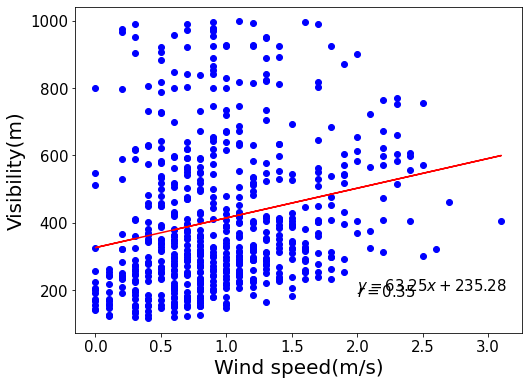

In [29]:
#from sklearn.linear_model import LinearRegression
#from math import fabs
reg_1 = LinearRegression()
###for day

df_2020_95_V_5000 = df_2020[(df_2020['Visibility(m)'] <= 1000) & (df_2020['Relative Humidity'] >= 98)]
X = df_2020_95_V_5000['average wind speed (m/s)'].values.reshape(-1, 1)  # values converts it into a numpy array
Y = df_2020_95_V_5000['Visibility(m)'].values.reshape(-1,1)  # values converts it into a numpy array
x = sm.add_constant(df_2020_95_V_5000['average wind speed (m/s)'].values.reshape(-1,1))

reg_1.fit(X, Y)
reg_1.coef_[0][0]

Y_pred = reg_1.predict(X)
model = sm.OLS(Y, x)
results = model.fit()
cc = df_2020_95_V_5000[["Visibility(m)", "average wind speed (m/s)"]].corr()
print(results.summary())

print('coefficient of determination:', results.rsquared)

print('adjusted coefficient of determination:', results.rsquared_adj)
print('coefficient of determination:', reg_1.score(X,Y))
print('regression coefficients:', results.params)
print('slope:', reg_1.coef_)
print('intercept:', reg_1.intercept_)
print(cc)

#print(scipy.stats.norm.interval(alpha=0.95, 
              #df=len(X)-1, 
              #loc=np.mean(X), scale=scipy.stats.sem(X)))
        
#print(scipy.stats.norm.interval(alpha=0.95, 
                 #loc=np.mean(X), scale=scipy.stats.sem(X)))
plt.figure(figsize=(8,6))
plt.scatter(X, Y, color = 'blue')
plt.plot(X, Y_pred, color='red')

plt.xlabel('Wind speed(m/s)', fontsize = 20)
plt.ylabel('Visibility(m)', fontsize = 20)
plt.text(2.0, 200, r'$y = 63.25x + 235.28$',
         fontsize=15)
plt.text(2.0, 180, r'$r = 0.35$', fontsize = 15)
plt.tick_params(axis='x', which='both', labelsize=15)
plt.tick_params(axis='y', which='both', labelsize=15)

#y_err = Y - Y_pred
#
#mean_x = X.T.mean()
#
#n = len(X)
#
#dof = n - results.df_model - 1
#
#t = scipy.stats.t.ppf(1-0.025, df=dof)
#s_err = np.sum(np.power(y_err, 2))
#conf = t * np.sqrt((s_err/(n-2))*(1.0/n + (np.power((X- mean_x),2) / ((np.sum(np.power(X,2))) - n*(np.power(mean_x,2))))))
#upper = Y_pred + abs(conf)
#
#lower = Y_pred - abs(conf)
#plt.fill_between(X.reshape(437,), lower.reshape(437,), upper.reshape(437,), color = '#8888', alpha=0.9)



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     67.29
Date:                Sun, 14 Nov 2021   Prob (F-statistic):           2.74e-15
Time:                        22:40:21   Log-Likelihood:                -2532.4
No. Observations:                 432   AIC:                             5069.
Df Residuals:                     430   BIC:                             5077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        231.2029      8.287     27.901      0.0

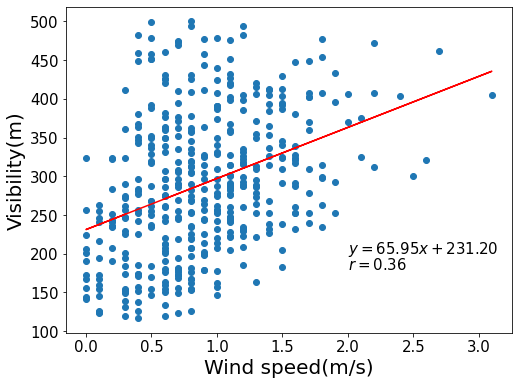

In [30]:
#hx = data_2020_95_nrain.plot(kind = 'scatter', x = 'average wind speed (m/s)', 
#y = 'Visibility(m)', fontsize = 15,c = 'g')
reg_2 = LinearRegression()

df_2020_100_V_5000 = df_2020_100[(df_2020_100['Visibility(m)'] <= 500)]
Xx = df_2020_100_V_5000['average wind speed (m/s)'].values.reshape(-1,1)  # values converts it into a numpy array
Yy = df_2020_100_V_5000['Visibility(m)'].values.reshape(-1,1)  # values converts it into a numpy array
xx = sm.add_constant(df_2020_100_V_5000['average wind speed (m/s)'].values.reshape(-1,1))

reg_2.fit(Xx, Yy)
#regression.coef_[0][0]
Yy_pred = reg_2.predict(Xx)
plt.figure(figsize=(8,6))
plt.scatter(Xx, Yy)
plt.plot(Xx, Yy_pred, color='red')

plt.xlabel('Wind speed(m/s)', fontsize = 20)
plt.ylabel('Visibility(m)', fontsize = 20)
plt.show
plt.text(2.0, 180, r'$r = 0.36$', fontsize = 15)
plt.text(2.0, 200, r'$y = 65.95x + 231.20$', fontsize = 15)
plt.tick_params(axis='x', which='both', labelsize=15)
plt.tick_params(axis='y', which='both', labelsize=15)

model_2 = sm.OLS(Yy, xx)
results_2 = model_2.fit()
cc_2 = df_2020_100_V_5000[["Visibility(m)", "average wind speed (m/s)"]].corr()

print(results_2.summary())
print('coefficient of determination:', results_2.rsquared)
print('adjusted coefficient of determination:', results_2.rsquared_adj)
print('coefficient of determination:', reg_2.score(X,Y))
print('regression coefficients:', results_2.params)
print('slope:', reg_2.coef_)
print('intercept:', reg_2.intercept_)
print(cc_2)


In [31]:
def fit_distribution(dataframe,column,pct,pct_lower):
    # Set up list of candidate distributions to use
    # See https://docs.scipy.org/doc/scipy/reference/stats.html for more
    y_std,size,y_org = standarise(dataframe,column,pct,pct_lower)
    dist_names = ['weibull_min','norm','weibull_max','beta',
                 'invgauss','uniform','gamma','expon', 'lognorm','pearson3','triang',
                 'exponweib', 't']

    chi_square_statistics = []
    # 11 bins
    percentile_bins = np.linspace(0,100,11)
    percentile_cutoffs = np.percentile(y_std, percentile_bins)
    observed_frequency, bins = (np.histogram(y_std, bins=percentile_cutoffs))
    cum_observed_frequency = np.cumsum(observed_frequency)

    # Loop through candidate distributions

    for distribution in dist_names:
        # Set up distribution and get fitted distribution parameters
        dist = getattr(scipy.stats, distribution)
        param = dist.fit(y_std)
        print("{}\n{}\n".format(dist, param))
      

        # Get expected counts in percentile bins
        # cdf of fitted distribution across bins
        cdf_fitted = dist.cdf(percentile_cutoffs, *param)
        expected_frequency = []
        for bin in range(len(percentile_bins)-1):
            expected_cdf_area = cdf_fitted[bin+1] - cdf_fitted[bin]
            expected_frequency.append(expected_cdf_area)

        # Chi-square Statistics
        expected_frequency = np.array(expected_frequency) * size
        cum_expected_frequency = np.cumsum(expected_frequency)
        ss = round(sum (((cum_expected_frequency - cum_observed_frequency) ** 2) / cum_observed_frequency),0)
        chi_square_statistics.append(ss)


    #Sort by minimum ch-square statistics
    results = pd.DataFrame()
    results['Distribution'] = dist_names
    results['chi_square'] = chi_square_statistics
    results.sort_values(['chi_square'], inplace=True)


    print ('\nDistributions listed by Betterment of fit:')
    print ('............................................')
    print (results)

In [32]:
fit_distribution(df_vis_5001, 'average wind speed (m/s)', 0.999, 0.001)

(1.6740516992288152, -1.6044630127110167, 1.7994681756378863)

(2.1784304234082113e-16, 1.0)

(0.6031498997855664, 4.428253193193154, 1.277215671455577)

(2.840714693729822, 775315.7618431202, -1.6871220631656234, 460785.54368018114)

(0.21808188093364, -2.1850612116958525, 10.01945693780954)

(-1.5827385072909375, 6.01099170048409)

(2.866156332539332, -1.690452463643208, 0.5897962274334139)

(-1.5827385072909375, 1.5827385072909377)

(0.46458635123514264, -2.1109467546427405, 1.8975564447985542)

(1.181312298115591, 1.65639958034622e-16, 0.9984952050562035)

(0.09838467950275044, -1.6555384870184748, 6.0859217482866015)

(2.6207778858447073, 1.1340934929201183, -1.708200881277315, 1.0817910422922083)

(6.298524789312337, -0.11748472953889738, 0.8340544832580156)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
8       lognorm       118.0
4      invgauss       149.0
11    exponweib       230.0
6         gamma       2

count    436.000000
mean       0.890826
std        0.510810
min        0.000000
25%        0.500000
50%        0.800000
75%        1.200000
max        3.100000
Name: average wind speed (m/s), dtype: float64
0.7006871277293865


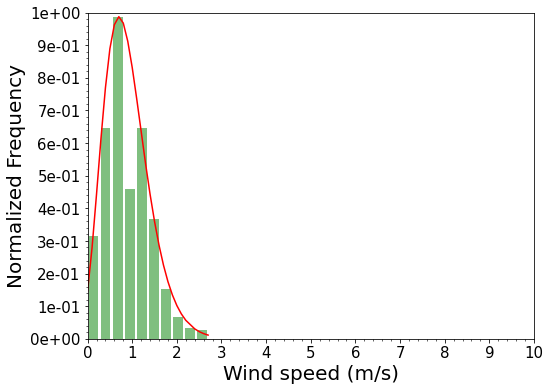

In [33]:
scale = count_500.max()/gamma.pdf(y_std_500, 
                                  7.618820552356827, -2.7891357944563175, 0.36608493486062854).max()
#
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.hist(y_500, color = 'g', alpha=0.5, density = True,rwidth=0.8)
axes.set_xlabel('Wind speed (m/s)', fontsize = 20)
axes.set_ylabel('Normalized Frequency', fontsize = 20)
axes.plot(y_500, gamma.pdf(y_std_500,
                           7.618820552356827, -2.7891357944563175, 0.36608493486062854)*scale, color = 'red')

axes.set_xlim([0, 10])
axes.set_xticks(np.arange(0,10.5, 1))

axes.set_ylim([0, 1.0])
axes.set_yticks(np.arange(0,1.1, 0.1))

axes.minorticks_on()

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

axes.yaxis.set_major_formatter(FormatStrFormatter('%.e'))
axes.tick_params(axis='x', which='both', labelsize=15)
axes.tick_params(axis='y', which='both', labelsize=15)
#axes.set_title('Visibility < 500m (Dense Fog)', fontsize = 20, pad = 25)
print(df_vis_500['average wind speed (m/s)'].describe())

from scipy.stats import skew
print(skew(df_vis_500['average wind speed (m/s)'].values))

count    617.000000
mean       0.952674
std        0.546681
min        0.000000
25%        0.600000
50%        0.900000
75%        1.300000
max        3.100000
Name: average wind speed (m/s), dtype: float64
0.7065847090415845


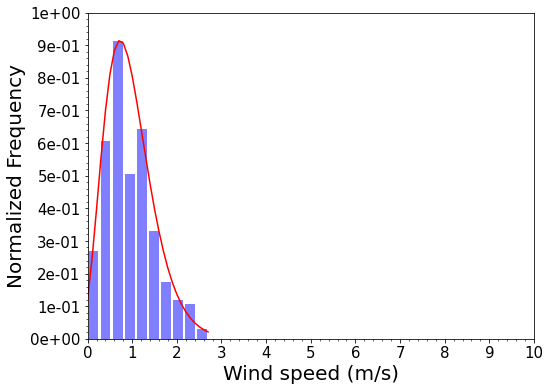

In [36]:
scale = count_1000.max()/gamma.pdf(y_std_1000, 
                                  6.099927525843387, -2.4955076196985675, 0.40910481551750677).max()
#
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.hist(y_1000, color = 'b', alpha=0.5, density = True,rwidth=0.8)
axes.set_xlabel('Wind speed (m/s)', fontsize = 20)
axes.set_ylabel('Normalized Frequency', fontsize = 20)
axes.plot(y_1000, gamma.pdf(y_std_1000,
                           6.099927525843387, -2.4955076196985675, 0.40910481551750677)*scale, color = 'red')

axes.set_xlim([0, 10])
axes.set_xticks(np.arange(0,10.5, 1))

axes.set_ylim([0, 1.0])
axes.set_yticks(np.arange(0,1.1, 0.1))

axes.minorticks_on()

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

axes.yaxis.set_major_formatter(FormatStrFormatter('%.e'))
axes.tick_params(axis='x', which='both', labelsize=15)
axes.tick_params(axis='y', which='both', labelsize=15)


print(df_vis_1000['average wind speed (m/s)'].describe())
print(skew(df_vis_1000['average wind speed (m/s)'].values))

count    2649.000000
mean        1.001284
std         0.610524
min         0.000000
25%         0.600000
50%         0.900000
75%         1.300000
max         5.200000
Name: average wind speed (m/s), dtype: float64
1.3931960800731704


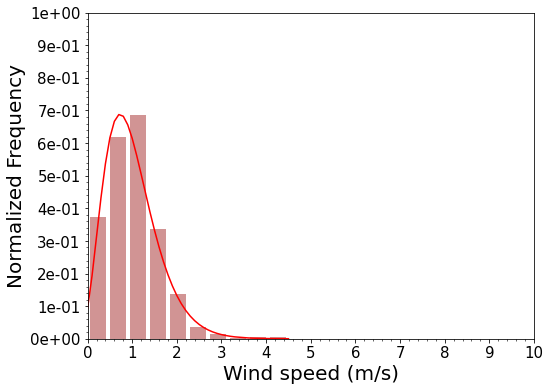

In [38]:
scale = count_5000.max()/gamma.pdf(y_std_5000, 
                                  4.800757895118203, -2.172657040411835, 0.4525652460132255).max()
#
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.hist(y_5000, color = 'brown', alpha=0.5, density = True,rwidth=0.8)
axes.set_xlabel('Wind speed (m/s)', fontsize = 20)
axes.set_ylabel('Normalized Frequency', fontsize = 20)
axes.plot(y_5000, gamma.pdf(y_std_5000,
                           4.800757895118203, -2.172657040411835, 0.4525652460132255)*scale, color = 'red')

axes.set_xlim([0, 10])
axes.set_xticks(np.arange(0,10.5, 1))

axes.set_ylim([0, 1.0])
axes.set_yticks(np.arange(0,1.1, 0.1))

axes.minorticks_on()

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

axes.yaxis.set_major_formatter(FormatStrFormatter('%.e'))
axes.tick_params(axis='x', which='both', labelsize=15)
axes.tick_params(axis='y', which='both', labelsize=15)

print(df_vis_5000['average wind speed (m/s)'].describe())
print(skew(df_vis_5000['average wind speed (m/s)'].values))

count    25101.000000
mean         2.111055
std          1.347467
min          0.000000
25%          1.100000
50%          1.800000
75%          2.800000
max         10.200000
Name: average wind speed (m/s), dtype: float64
1.1429268435423607


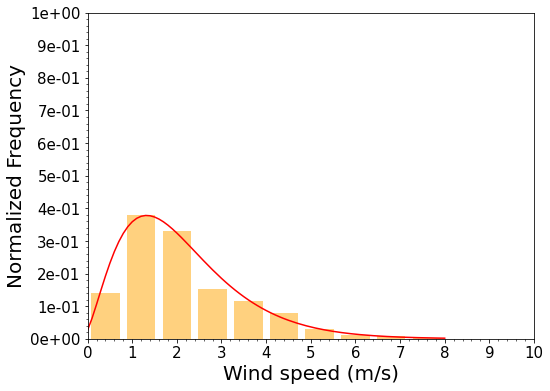

In [39]:
scale = count_5001.max()/gamma.pdf(y_std_5001, 
                                  2.866156332539332, -1.690452463643208, 0.5897962274334139).max()
#
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
axes.hist(y_5001, color = 'orange', alpha=0.5, density = True,rwidth=0.8)
axes.set_xlabel('Wind speed (m/s)', fontsize = 20)
axes.set_ylabel('Normalized Frequency', fontsize = 20)
axes.plot(y_5001, gamma.pdf(y_std_5001,
                           2.866156332539332, -1.690452463643208, 0.5897962274334139)*scale, color = 'red')

axes.set_xlim([0, 10])
axes.set_xticks(np.arange(0,10.5, 1))

axes.set_ylim([0, 1.0])
axes.set_yticks(np.arange(0,1.1, 0.1))

axes.minorticks_on()

#ax[0].yticks(yticks,[f'{y:.2e}' for y in yticks])

axes.yaxis.set_major_formatter(FormatStrFormatter('%.e'))
axes.tick_params(axis='x', which='both', labelsize=15)
axes.tick_params(axis='y', which='both', labelsize=15)

print(df_vis_5001['average wind speed (m/s)'].describe())
print(skew(df_vis_5001['average wind speed (m/s)'].values))

In [64]:
fit_distribution(df_2020_95, 'Visibility(m)', 0.999, 0.001)

(1.0621415722766727, -1.360014839819799, 1.1836007410094553)

(1.2560346661689383e-16, 0.9999999999999998)

(0.5640318367780419, 2.7610663981022796, 1.332502649490621)

(1.1382142081427817, 3.8812569996202217, -1.3603077888383064, 5.95661179129937)

(0.2662535642691526, -2.0195470095540955, 7.585053140971755)

(-1.359990533666275, 4.121056931768554)

(1.807953252914329, -1.4336465264402012, 0.7929656273592296)

(-1.359990533666275, 1.3599905336662752)

(0.5072428900592374, -1.9595461746413334, 1.7281794705262725)

(1.4874830722486254, 3.7233237294096925e-17, 1.0662425206075707)

(0.0013033305230172006, -1.3614543189263035, 4.464259585157223)

(0.5185395504671421, 1.9429760122870625, -1.3599951227815021, 2.1242553558234705)

(4.951992944462125, -0.14475843639407676, 0.7965269198337335)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
6         gamma        89.0
9      pearson3        89.0
4      invgauss       115.0
8 

In [135]:


y_std,len_y,y = standarise(df_2020_95,'Visibility(m)',0.999,0.001)

type(y)


list

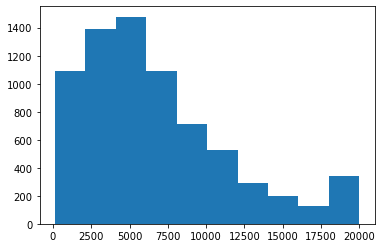

In [136]:
genders = df_2020_95.rain_nrain.unique()
count1, bins1, ignored = plt.hist(y)



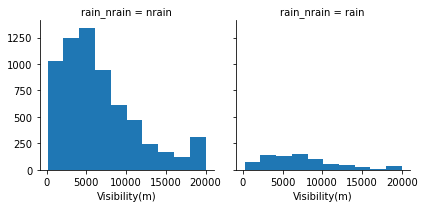

In [133]:
import seaborn as sns
#fig, ax = plt.subplots(1,2)
#xx = df_2020_95['Visibility(m)'].values.tolist()
#genders = genders.tolist()
#ax.hist(xx, label= a)
#grid = sns.FacetGrid(df_2020_95, col= 'rain_nrain', margin_titles=True)
#grid.map(plt.hist(), "Visibility(m)")

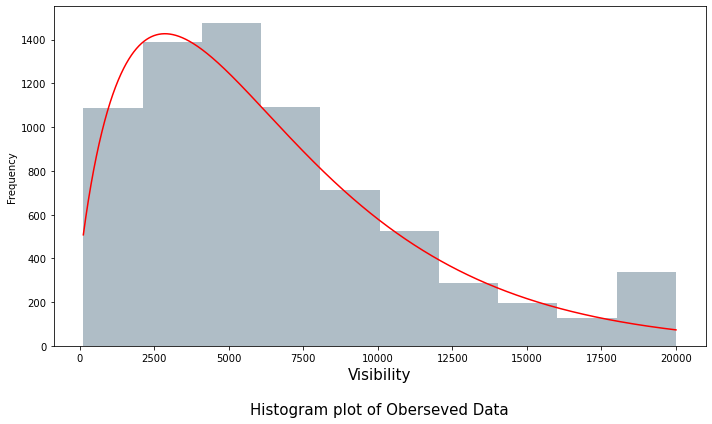

In [138]:
scale = count1.max()/gamma.pdf(y_std,1.64, -1.38, 0.84).max()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))
axes.hist(y, color = '#607c8e', alpha=0.5, density = False)
axes.set_xlabel('Visibility\n\nHistogram plot of Oberseved Data', fontsize = 15)
axes.set_ylabel('Frequency')
axes.plot(y,gamma.pdf(y_std,1.807953252914329, -1.4336465264402012, 0.7929656273592296)*scale, color = 'red')
#axes[1].plot(y,gamma.pdf(y_std,1.64, -1.38, 0.84))
#axes[1].set_xlabel('Visibility\n\ngammadistribution')
#axes[1].set_ylabel('pdf')

#axes[2].plot(y,pearson3.pdf(y_std,1.56, 8.749166642452289e-05, 1.08))
#axes[2].set_xlabel('Visibility\n\npearson3')
#axes[2].set_ylabel('pdf')
fig.tight_layout()


In [25]:
gamma.pdf(y_std,1.64, -1.38, 0.84).shape

(7241,)

In [26]:
fit_distribution(df_2020_100, 'Visibility(m)', 0.999, 0.001)

(1.101489123918316, -1.158151916763806, 1.197372396847106)

(-6.115483470770093e-17, 1.0)

(176870132.98460037, 119366636.28639197, 119366636.70263436)

(0.9972805310035773, 8.420069342083226, -1.157925276096716, 10.904022043170524)

(0.41613107102739866, -1.5939053489792685, 3.8302952601442106)

(-1.1579252760965715, 5.442163567191319)

(1.0930268897244044, -1.1580685348548272, 1.059513953453207)

(-1.1579252760965715, 1.1579252760965715)

(0.6231408565316634, -1.5393674511776365, 1.275323654868108)

(1.9130283435097915, -4.588790354510091e-17, 1.1077100977203012)

(2.7862048936907342e-08, -1.157925441729517, 5.568710073282183)

(0.582671713647505, 1.5221081513248285, -1.1579252760965717, 1.7500516306367562)

(3.352778066194845, -0.17692101514844866, 0.6506499080838493)


Distributions listed by Betterment of fit:
............................................
   Distribution  chi_square
11    exponweib       184.0
3          beta       260.0
4      invgauss       260.0
0   weibull_min 

In [27]:
yy_std,len_yy,yy = standarise(df_2020_100,'Visibility(m)',0.999,0.001)

Text(0, 0.5, 'Frequency')

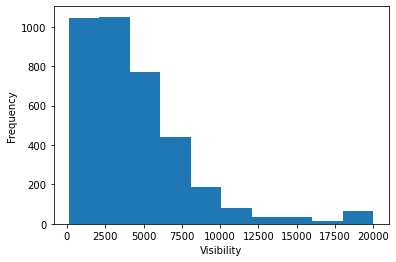

In [28]:

c, b , i = plt.hist(yy)
plt.xlabel('Visibility')
plt.ylabel('Frequency')
#count.shape


In [29]:
scale2 =  c.max()/exponweib.pdf(yy_std, 0.582671713647505, 
                                    1.5221081513248285, -1.1579252760965717, 
                                    1.7500516306367562).max()

scale3 =  c.max()/beta.pdf(yy_std,
                              0.9972805310035773, 8.420069342083226, 
                               -1.157925276096716, 10.904022043170524).max()



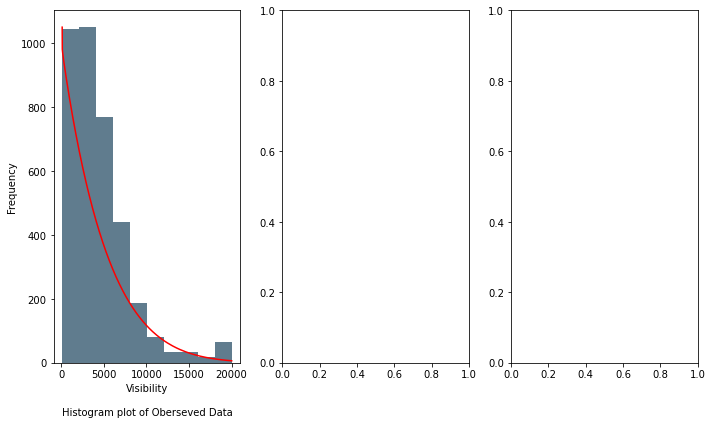

In [30]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 6))
axes[0].hist(yy, color = '#607c8e')
axes[0].set_xlabel('Visibility\n\nHistogram plot of Oberseved Data')
axes[0].set_ylabel('Frequency')
axes[0].plot(yy, beta.pdf(yy_std,
                              0.9972805310035773, 8.420069342083226, 
                               -1.157925276096716, 10.904022043170524)*scale3, color = 'red')
             
#axes[1].set_xlabel('Visibility\n\nbeta')
#axes[1].set_ylabel('pdf')
#axes[2].plot(y,exponweib.pdf(y_std,0.6720830816272324, 1.3136466361903902, -1.1051314021268408, 1.4710571980213363))
#axes[2].set_xlabel('Visibility\n\nweibull_min')
#axes[2].set_ylabel('pdf')
fig.tight_layout()

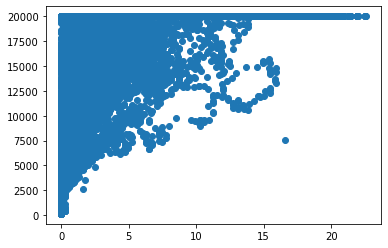

In [72]:
reg_3 = LinearRegression()

X = df_2020['t-td'].values.reshape(-1,1)  # values converts it into a numpy array
Y = df_2020['Visibility(m)'].values.reshape(-1,1)  # values converts it into a numpy array
x = sm.add_constant(df_2020['t-td'].values.reshape(-1,1))

reg_3.fit(X, Y)
#regression.coef_[0][0]
Y_pred = reg_3.predict(X)

plt.scatter(X, Y)


In [73]:
df_2020_new =df_2020.set_index(df_2020['Time (CET)'])
df_2020_new.columns

Index(['Time (CET)', 'Temperature', 'Relative Humidity', 'Pressure',
       'average wind speed (m/s)', 'wind direction',
       'precipitation amount (mm)', 'Visibility(m)', 'global radiation',
       'reflex radiation', 'atmosphere long-wave reflection',
       'surface long-wave radiation', 'time', 'day_or_night', 'day_night',
       'rain_nrain', 'rain_0_1', 'num', 'den', 'td', 't-td'],
      dtype='object')

array([[<AxesSubplot:xlabel='Time (CET)'>],
       [<AxesSubplot:xlabel='Time (CET)'>],
       [<AxesSubplot:xlabel='Time (CET)'>],
       [<AxesSubplot:xlabel='Time (CET)'>]], dtype=object)

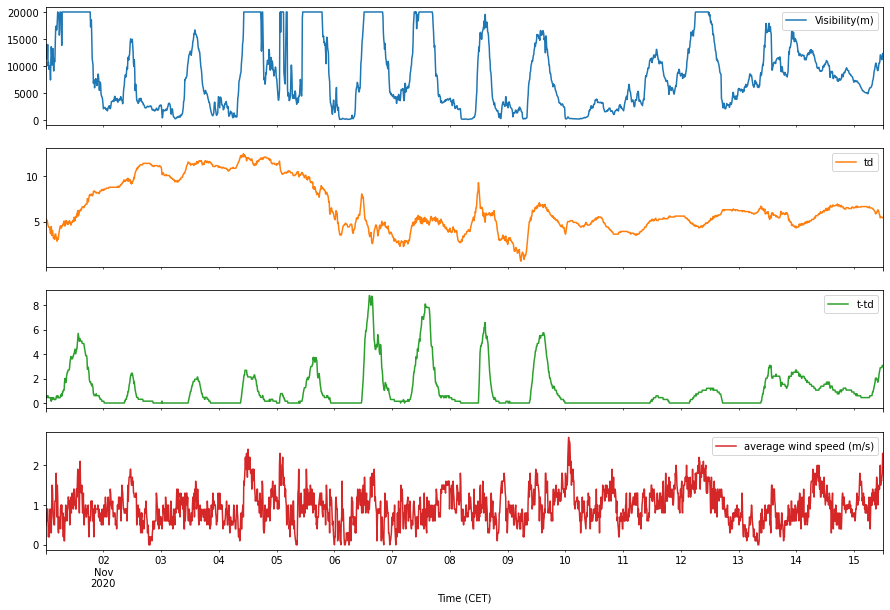

In [98]:
df_2020_new[['Visibility(m)', 'td', 't-td', 
             'average wind speed (m/s)']][0:2088].plot(figsize = (15,10), 
                                                       subplots = True, layout = (4,1), sharex = True)

In [99]:
df_2020_new_9 = df_2020_new[(df_2020_new['Time (CET)'] >= '2020-11-9') & (df_2020_new['Time (CET)'] <= '2020-11-12')]
                           


Text(0, 0.5, 'Temperature')

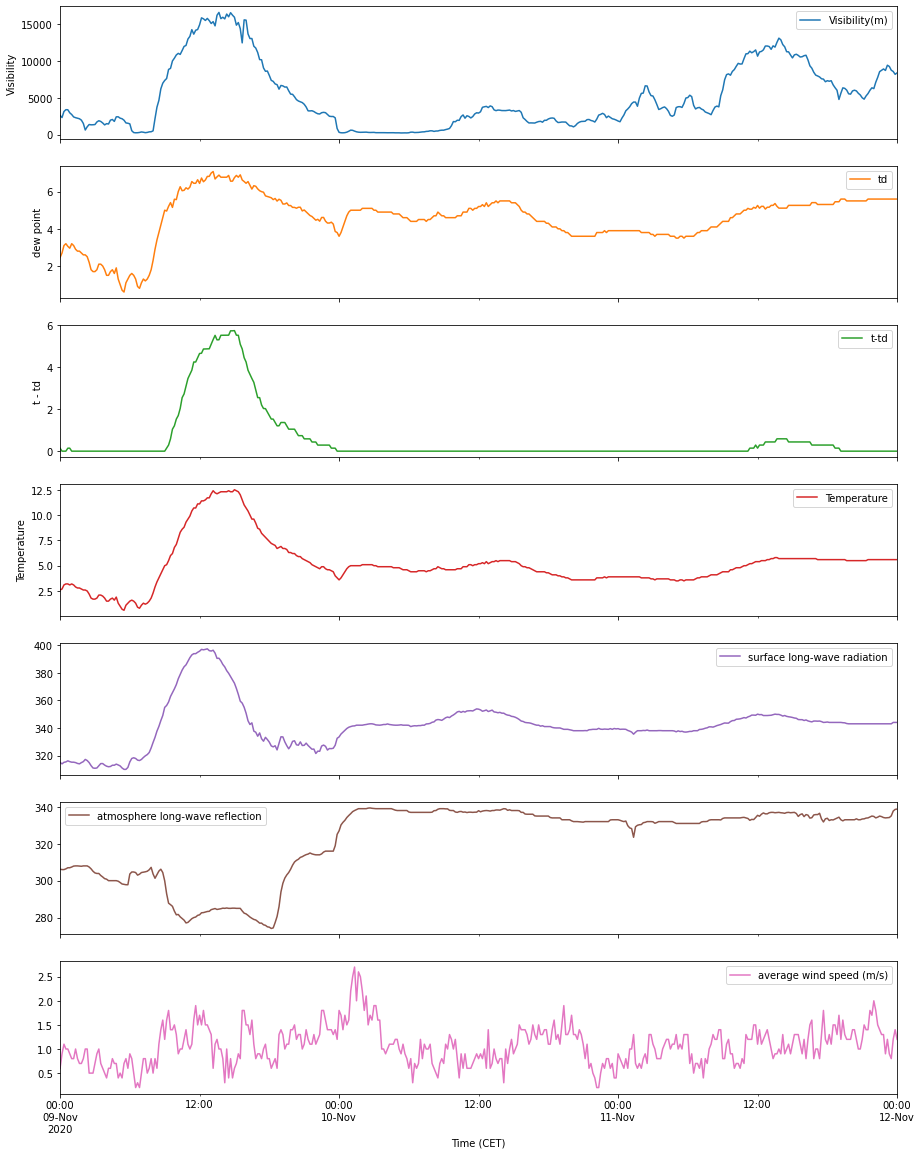

In [121]:
axes = df_2020_new_9[['Visibility(m)', 'td', 't-td', 'Temperature',
                     'surface long-wave radiation',
                     'atmosphere long-wave reflection',
                     'average wind speed (m/s)']].plot(figsize = (15,20), layout = (7,1), subplots = True)
axes[0][0].set_ylabel('Visibility')
axes[1][0].set_ylabel('dew point')
axes[2][0].set_ylabel('t - td')
axes[3][0].set_ylabel('Temperature')


In [233]:
from decimal import *

import math
getcontext().prec = 10




x = (df_2020_new['surface long-wave radiation']/5.67 * 10** -8).apply(Decimal) 
y = ((df_2020_new['Temperature']+ 273.15)**4).apply(Decimal)
z = x+y 

In [235]:
z1 = pd.to_numeric(z)
(z1**0.25) - 273.15

Time (CET)
2020-11-01 00:10:00     5.6
2020-11-01 00:20:00     5.7
2020-11-01 00:30:00     5.4
2020-11-01 00:40:00     5.5
2020-11-01 00:50:00     5.4
                       ... 
2021-05-16 23:20:00    10.9
2021-05-16 23:30:00    10.7
2021-05-16 23:40:00    10.5
2021-05-16 23:50:00    10.6
2021-05-17 00:00:00    10.6
Length: 28368, dtype: float64

In [69]:
df_2020_95.columns

Index(['Time (CET)', 'Temperature', 'Relative Humidity', 'Pressure',
       'average wind speed (m/s)', 'wind direction',
       'precipitation amount (mm)', 'Visibility(m)', 'global radiation',
       'reflex radiation', 'atmosphere long-wave reflection',
       'surface long-wave radiation', 'time', 'day_or_night', 'day_night',
       'rain_nrain', 'rain_0_1', 'num', 'den', 'td', 't-td'],
      dtype='object')

In [104]:
df_2020['Time (CET)'] = pd.to_datetime(df_2020['Time (CET)'])

In [105]:
df_2020 = df_2020.set_index(df_2020['Time (CET)'])

In [ ]:
vis = []
for i in range(len(df_2020['Visibility(m)'])):
    if df_2020['Visibility(m)'] <

<AxesSubplot:xlabel='Time (CET)'>

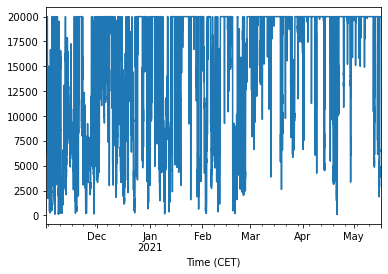

In [106]:
fig, ax = plt.subplots(1)
plt.rcParams["figure.figsize"] = (20,6)
params = {'mathtext.default': 'regular' }          
#ax.plot(combined_rad['Net_rn'][1600:1800], label = 'Net_Rn')


In [107]:
df_2020.columns

Index(['Time (CET)', 'Temperature', 'Relative Humidity', 'Pressure',
       'average wind speed (m/s)', 'wind direction',
       'precipitation amount (mm)', 'Visibility(m)', 'global radiation',
       'reflex radiation', 'atmosphere long-wave reflection',
       'surface long-wave radiation', 'time', 'day_or_night', 'day_night',
       'rain_nrain', 'rain_0_1', 'num', 'den', 'td', 't-td'],
      dtype='object')